# Data Science Lecture Exercise - 2018

## Gas prices analisys and prediction

In [32]:


import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.cross_validation import train_test_split

### Functions and path

In [2]:
def DataRead(str1, useCols, tablenames):
    dataTable = pd.read_csv("%s" % str1, header=None, sep="\s*\;",usecols=useCols, names=tablenames,  engine='python')
    dataTable.drop(dataTable.index[[0]], inplace=True)
    return dataTable

In [3]:
def CollumnFill (name, data, index, df):
    df[name][index] = data
    return


In [4]:
def CollumnAppend (name, data, df): 
    df = df.append(data, ignore_index=True)
    return

In [5]:
tablePath = "C:/Users/rsabedra/Documents/Python/example_sprit_cut_prices.csv"
tablePath2 = "C:/Users/rsabedra/Documents/Python/example_sprit_cut_station.csv"

### Extracting and cleaning the data 

In [6]:
useColls = [0, 1, 2, 3, 4]
tableCollumns = ['ID', 'E5', 'E10', 'DIESEL', 'DATA'] 
table = DataRead(tablePath, useColls , tableCollumns)



table.E5 = pd.to_numeric(table.E5, errors='coerce')
table.E10 = pd.to_numeric(table.E10, errors='coerce')
table.DIESEL = pd.to_numeric(table.DIESEL, errors='coerce')


useColls2 = [0, 4, 7,10,11]
tableCollumns2 = ['ID', 'BRAND', 'POST_CODE', 'LAT', 'LNG'] 
table2 = DataRead(tablePath2, useColls2 , tableCollumns2)


# =============================================================================
# Organizing and cleaning the data
# =============================================================================

table = table.dropna()

table = table.drop(table[table.E5 > 8000].index)
table = table.drop(table[table.E5 < 10].index)

table = table.drop(table[table.E10 > 8000].index)
table = table.drop(table[table.E10 < 10].index)

table = table.drop(table[table.DIESEL > 8000].index)
table = table.drop(table[table.DIESEL < 10].index)


table = table.reset_index(drop=True)
table = table.drop_duplicates(inplace=False)

table2 = table2.dropna()
table2 = table2.reset_index(drop=True)
table2 = table2.drop_duplicates(inplace=False)


### Auxiliary function to create a months list based on the data

In [7]:
MonthsTotal = list()

monthAux = table.iloc[0, 4][1:-20]
MonthsTotal.append(monthAux)

for x in range (0, len(table.DATA)):
    if (monthAux != table.iloc[x, 4][1:-20]):
        value = table.iloc[x, 4][1:-20]
        monthAux = table.iloc[x, 4][1:-20]
    
        MonthsTotal.append(value)
        

MonthsTotal = list(set(MonthsTotal))
MonthsTotal.sort()

### How many different brands are there?

In [8]:
tst = table2.groupby(['BRAND']).groups.keys()
len(tst)


53

### How many different locations are present in the data?

In [9]:
len(table2.groupby(['LAT' , 'LNG']).count())


397

### What is the min, max price for each gasoline type, per month?

Text(0,0.5,'Price')

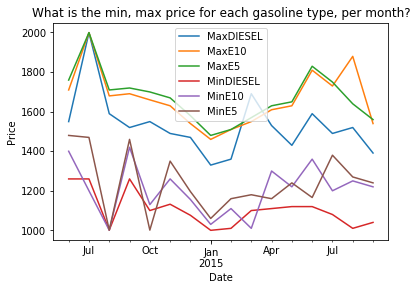

In [10]:
listMaxE5 = list()
listMaxE10 = list()
listMaxDIESEL = list()

listMinE5 = list()
listMinE10 = list()
listMinDIESEL = list()
listLocMinDIESEL = list()


var = table.iloc[0, 4][1:-20]

for y in range (0, len(MonthsTotal)):
    E5Max = 0
    E10Max = 0
    DIESELMax = 0

    E5Min = 9999999
    E10Min = 9999999
    DIESELMin = 9999999
    
    
    for x in range (0, len(table.DATA)):
        if(MonthsTotal[y] == table.iloc[x, 4][1:-20]):
     
            if (E5Max < table.iloc[x, 1]):  
                E5Max = table.iloc[x, 1]
            elif (E5Min > table.iloc[x, 1]): 
                E5Min = table.iloc[x, 1]
                                
            if (E10Max < table.iloc[x, 2]):
                E10Max = table.iloc[x, 2]
            elif (E10Min > table.iloc[x, 2]):
                E10Min = table.iloc[x, 2]
            
            if (DIESELMax < table.iloc[x, 3]): 
                DIESELMax = table.iloc[x, 3]
            elif (DIESELMin > table.iloc[x, 3]): 
                DIESELMin = table.iloc[x, 3]
                IdDiesel= table.iloc[x, 0]  
                
                

    listMaxE5.append(E5Max)
    listMaxE10.append(E10Max)
    listMaxDIESEL.append(DIESELMax)

    listMinE5.append(E5Min)
    listMinE10.append(E10Min)
    listMinDIESEL.append(DIESELMin)
    listLocMinDIESEL.append(IdDiesel)
    
MaxMinGasolineMonth = pd.DataFrame(
    {'Month': MonthsTotal,
     'MaxE5': listMaxE5,
     'MinE5': listMinE5,
     'MaxE10': listMaxE10,
     'MinE10': listMinE10,
     'MaxDIESEL': listMaxDIESEL,
     'MinDIESEL': listMinDIESEL
    })
    
MaxMinGasolineMonth['Month'] = pd.to_datetime(MaxMinGasolineMonth['Month'], format='%Y-%m')
MaxMinGasolineMonth.plot.line(x='Month')
plt.title('What is the min, max price for each gasoline type, per month?')
plt.xlabel('Date')
plt.ylabel('Price')    

### What is the mean of each gasoline type?

Text(0.5,1,'What is the mean of each gasoline type?')

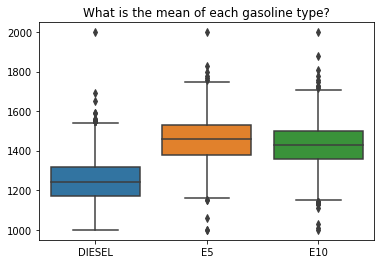

In [11]:
table.describe()

boxplot = pd.DataFrame()
boxplot['ID'] = table['ID']
boxplot['DIESEL'] = table['DIESEL']
boxplot['E5'] = table['E5']
boxplot['E10'] = table['E10']

ax = sns.boxplot( data=boxplot)
ax.set_title('What is the mean of each gasoline type?')



### What is the brand with major number of gas stations?

Text(0.5,1,'What is the brand with major number of gas stations?')

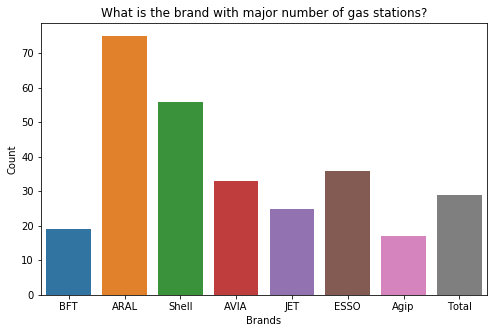

In [21]:
listQuantOfBrands = list()


for y in range (0, len(tst)):
    cont = 0

    for x in range (0, len(table2.BRAND)):
        if(tst[y] == table2.iloc[x, 1]):
     
            cont += 1

    listQuantOfBrands.append(cont)

majorGasStations = pd.DataFrame(
{
 'Brands':[x for x in tst],
 'Count':[ x for x in listQuantOfBrands]
}) 


majorGasStations = majorGasStations.drop(majorGasStations[majorGasStations.Count < 12].index)
        
dim = (8, 5)
fig, ax = pyplot.subplots(figsize=dim)
ax = sns.barplot(x="Brands", y="Count",  data=majorGasStations)   
ax.set_title('What is the brand with major number of gas stations?') 


### What is the maximum range of each gasoline type per month?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

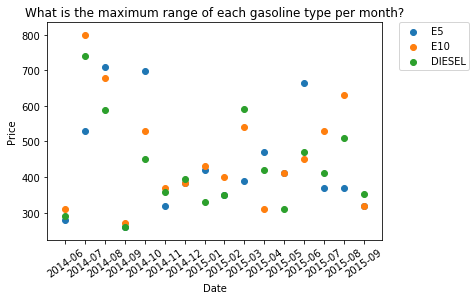

In [13]:
listRangeE5 = list()
listRangeE10 = list()
listRangeDIESEL = list()


for x in range (0, len(MonthsTotal)):
    listRangeE5.append(listMaxE5[x] - listMinE5[x])
    listRangeE10.append(listMaxE10[x] - listMinE10[x])
    listRangeDIESEL.append(listMaxDIESEL[x] - listMinDIESEL[x])

RangePrices = pd.DataFrame(
{
 'Month': MonthsTotal,
 'E5': listRangeE5,
 'E10': listRangeE10, 
 'DIESEL': listRangeDIESEL 
})   
    
f, ax = plt.subplots(1, 1, sharey=True)

ax.scatter(RangePrices.Month, RangePrices.E5)    
ax.scatter(RangePrices.Month, RangePrices.E10)  
ax.scatter(RangePrices.Month, RangePrices.DIESEL)      
plt.title('What is the maximum range of each gasoline type per month?')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(rotation=35)   

### What is the region with most concentration of gas stations?

Text(0.5,1,'What is the region with most concentration of gas stations?')

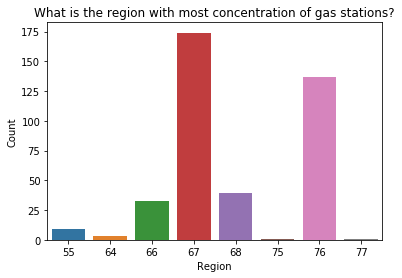

In [14]:
listPostReg = list()

for x in range (0, len(table2.POST_CODE)):
    listPostReg.append(table2.iloc[x, 2][0:-3])

RegionsGasStations = [[x,listPostReg.count(x)] for x in set(listPostReg)]

RegionsGasStations2 = pd.DataFrame(
{
 'Region':[ x[0] for x in RegionsGasStations],
 'Count':[ x[1] for x in RegionsGasStations]
}) 
RegionsGasStations2 = RegionsGasStations2.iloc[2:]


ax = sns.barplot(x="Region", y="Count",  data=RegionsGasStations2)   
ax.set_title('What is the region with most concentration of gas stations?')  


### What is the whole Diesel variation?

In [ ]:
diesel = pd.DataFrame()
diesel['ID'] = table['ID']
diesel['DIESEL'] = table['DIESEL']
diesel['DATA'] = pd.to_datetime(table['DATA'], format='"%Y-%m-%d %H:%M:%S.%f"')
dieselAux = diesel.copy()

dieselAux.set_index('DATA', drop=False, inplace=True)
dieselAux.groupby('ID')['DIESEL'].plot(legend=False)
plt.title('What is the whole Diesel variation?')
plt.xlabel('Date')
plt.ylabel('Price')

## Machine learning predictor

In [16]:
#Preparing variables

datadates = diesel.DATA.values
datamonths = pd.Series(data=[pd.to_datetime(x).month for x in datadates],  name='month')
datadays = pd.Series([pd.to_datetime(x).day for x in datadates],  name='day')
datahour = pd.Series([pd.to_datetime(x).hour for x in datadates],  name='hour')

diesel['DAY'] = datadays
diesel['MONTH'] = datamonths
diesel['HOUR'] = datahour

reg = LinearRegression()

teste = diesel.copy()
teste['E5'] = table['E5']
teste['E10'] = table['E10']
teste= teste.iloc[:50000,:]


labels = teste['DIESEL']
train1 = teste.drop(['ID', 'DIESEL', 'DATA'],axis=1)

### Simple Linear Regressor

In [17]:
x_train, x_test, y_train, y_test =train_test_split(train1, labels, test_size=0.40, random_state=20)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)


0.8812185969749381

### Gradient Boosting Regressor

In [30]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 800, max_depth = 8, min_samples_split = 4,
          learning_rate = 0.4, loss = 'ls')

clf.fit(x_train, y_train)

clf.score(x_test,y_test)

0.8951925989688242